In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
boston = pd.read_csv('~/OneDrive/Deviare/Datasets/final datasets/boston_house_prices.csv')

In [3]:
boston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


| Variable | Description |
|----------|-------------|
| CRIM     | Per capita crime rate by town |
| ZN       | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS    | Proportion of non-retail business acres per town |
| CHAS     | Charles River dummy variable (1 = tract bounds river; 0 = otherwise) |
| NOX      | Nitric oxide concentration (parts per 10 million) |
| RM       | Average number of rooms per dwelling |
| AGE      | Proportion of owner-occupied units built prior to 1940 |
| DIS      | Weighted distances to five Boston employment centers |
| RAD      | Index of accessibility to radial highways |
| TAX      | Full-value property-tax rate per \$10,000 |
| PTRATIO  | Pupil–teacher ratio by town |
| B        | 1000(Bk - 0.63)², where Bk is the proportion of Black residents by town |
| LSTAT    | Percentage of lower status population |
| MEDV     | Median value of owner-occupied homes in $1000s (target variable) |


### relationship

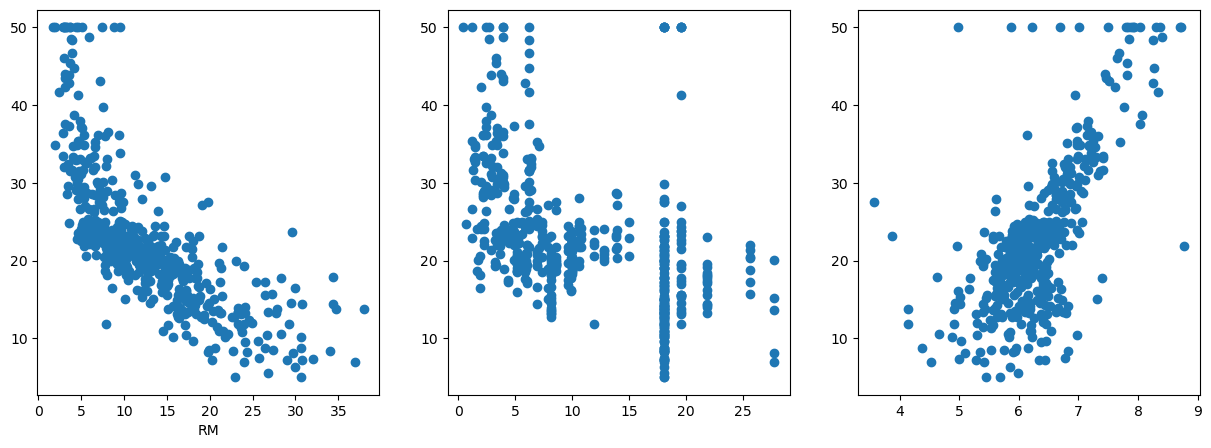

In [4]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
ax[0].scatter(boston['LSTAT'], boston['MEDV'])
ax[0].set_xlabel('LSTAT')
ax[1].scatter(boston['INDUS'], boston['MEDV'])
ax[0].set_xlabel('INDUS')
ax[2].scatter(boston['RM'], boston['MEDV'])
ax[0].set_xlabel('RM')
plt.show()

## Correlation

In [5]:
np.corrcoef(boston['RM'], boston['MEDV'])

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

In [6]:
print(f'Correlation between  RM   and MEDV: {boston['RM'].corr(boston['MEDV']):7.4f}')
print(f'Correlation between LSTAT and MEDV: {boston['LSTAT'].corr(boston['MEDV']):7.4f}')
print(f'Correlation between INDUS and MEDV: {boston['INDUS'].corr(boston['MEDV']):7.4f}')

Correlation between  RM   and MEDV:  0.6954
Correlation between LSTAT and MEDV: -0.7377
Correlation between INDUS and MEDV: -0.4837


### PS: CHAS -> is a categorical (binary) and hence correlation should not be calculated

In [7]:
corr_mat = boston.drop(columns = 'CHAS').corr()
corr_mat

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


In [8]:
mask_matrix = np.ones_like(corr_mat)
mask_matrix[np.tril_indices_from(mask_matrix)] = 0
mask_matrix

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

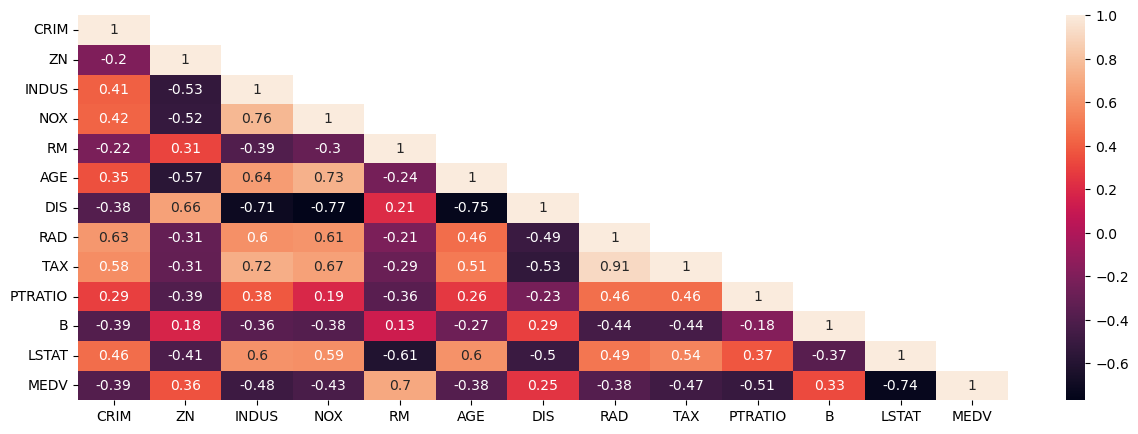

In [9]:
plt.figure(figsize = ( 15,5))
sns.heatmap(corr_mat, annot = True, mask = mask_matrix)
plt.show()

extreme values of correlation -1 and + 1 --> Strong Correlation 

0.65 - +1   -> Strong positive correlation

0.35 - 0.65 -> Mild positive correlation

-1 to -0.65  -> Strong Negative correlation

$-0.35$ to -0.65 -> Mild Negative correlation

-0.35 to +0.35 No correlation

### Simple Linear Regression

- Developing relationship between Target and predictor
- Relationship is linear - straight line
- $ y = c + mx$
- c is intercept
- m is slope
- such that the error is minimized

## Implementation - statsmodels
1. formula for relationship : Target ~ Predictor
2. X and y

In [10]:
from statsmodels.formula.api import ols

In [11]:
formula = 'MEDV ~ LSTAT'

In [12]:
# step 1 define and fit model object 
 
lm_model = ols(formula = 'MEDV ~ LSTAT', data = boston).fit()

In [13]:
# get summary 
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           5.08e-88
Time:                        11:21:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# prediction
y_pred = lm_model.predict(boston)

In [15]:
# evaluation 
from sklearn.metrics import r2_score, root_mean_squared_error

In [16]:
r2_score(y_true = boston.MEDV, y_pred = y_pred)

0.5441462975864799

In [17]:
lm_model = ols(formula = 'MEDV ~ LSTAT + RM +PTRATIO', data = boston).fit()
# prediction
y_pred = lm_model.predict(boston)
r2_score(y_true = boston.MEDV, y_pred = y_pred)

0.6786241601613112

## Baseline Regression Model - include all x variables

### Step 1 : train test split

In [21]:
# split the data
from sklearn.model_selection import train_test_split as split

In [22]:
train, test = split(boston, train_size= 0.80)

In [23]:
boston.shape

(506, 14)

In [24]:
506 *0.8

404.8

In [26]:
train.shape, test.shape

((404, 14), (102, 14))

## Data Prepartaion:
feature scaling or feature engineering after the train test split 

### Step 2 : create a base line model

Target ~ all features 

In [28]:
target = 'MEDV'

In [30]:
predictors = train.drop(columns = 'MEDV').columns
predictors

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [35]:
predictors_list = list(train.columns)
predictors_list.remove('MEDV')
print(predictors_list)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [36]:
predictors = ' + '.join(predictors_list)
predictors

'CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [37]:
target +' ~ ' + predictors

'MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [38]:
?ols

Signature: ols(formula, data, subset=None, drop_cols=None, *args, **kwargs)
Docstring:
Create a Model from a formula and dataframe.

Parameters
----------
formula : str or generic Formula object
    The formula specifying the model.
data : array_like
    The data for the model. See Notes.
subset : array_like
    An array-like object of booleans, integers, or index values that
    indicate the subset of df to use in the model. Assumes df is a
    `pandas.DataFrame`.
drop_cols : array_like
    Columns to drop from the design matrix.  Cannot be used to
    drop terms involving categoricals.
*args
    Additional positional argument that are passed to the model.
**kwargs
    These are passed to the model with one exception. The
    ``eval_env`` keyword is passed to patsy. It can be either a
    :class:`patsy:patsy.EvalEnvironment` object or an integer
    indicating the depth of the namespace to use. For example, the
    default ``eval_env=0`` uses the calling namespace. If you wish
    to 

In [39]:
lm_bs = ols(formula = target +' ~ ' + predictors, data = train).fit()

In [40]:
lm_bs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     87.20
Date:                Sun, 07 Sep 2025   Prob (F-statistic):          1.18e-106
Time:                        11:53:21   Log-Likelihood:                -1192.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     390   BIC:                             2469.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.3337      5.695      7.082      0.000      29.137      51.530
CRIM          -0.1104      0.034     -3.271      0.001      -0.177      -0.044
ZN             0.0447      0.016      2.833      0.005       0.014       0.076
INDUS         -0.0298      0.067     -0.445      0.656      -0.161       0.102
CHAS           2.5272      0.934      2.707      0.007       0.692       4.363
NOX          -16.2578      4.152     -3.916      0.000     -24.421      -8.095
RM             3.4149      0.468      7.300      0.000       2.495       4.335
AGE           -0.0048      0.015     -0.328      0.743      -0.033       0.024
DIS           -1.4882      0.219     -6.785      0.000      -1.919      -1.057
RAD            0.2627      0.077      3.416      0.001       0.112       0.414
TAX           -0.0103      0.004     -2.371      0.018      -0.019      -0.002
PTRATIO       -1.0520      0.147     -7.179      0.000      -1.340      -0.764
B              0.0092      0.003      3.222      0.001       0.004       0.015
LSTAT         -0.5048      0.055     -9.187      0.000      -0.613      -0.397
==============================================================================
Omnibus:                      149.784   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.734
Skew:                           1.580   Prob(JB):                    2.22e-141
Kurtosis:                       8.337   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- the CI -> range where the coefficient value may fall
- if this range has **0** that means the coefficient has a probability of being absolute **0** 
- the variable in question  may not be actually contributing

### **t test in Regression** 
Tests the hypothesis that the variable is non significant 

$H_0 :$ The corresponding variable is non significant 

$H_0 :$ The $\beta$ coefficient of the corresponding variable is non significant or close to zero hence non contributing 


Alternate :
$H_a :$ The variable or the $\beta$ is significant 

slope | coef --> $\beta$

### ANOVA in Regression

Checks overall feasibility 

$H_0 :$ All the predictors are non significant | or all $\beta$ coefficients are non significant or close to zero

$H_a :$ Atleast one predictor is significant 

### Evaluation Metrics
1. R Squared = coefficient of determination
Proportion explained by regression 

$$𝑅^2 = 1 −  𝑆𝑆𝐸/𝑆𝑆𝑇$$

2. Adjusted R squared : penalizes the R squared value for redundancy in the model
$$
\text{Adjusted } R^2 \;=\; 1 - (1 - R^2)\; \times \; \frac{n - 1}{n - p - 1}
$$



3. AIC & BIC : Information Criterion